In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import sys
import matplotlib.pyplot as plt
import time
sys.path.insert(1, '../../../../')
import gillespy2
from gillespy2 import NumPySSASolver , TauLeapingSolver, TauHybridSolver

In [2]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=50)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
#             rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
#             self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,100, 101))

In [3]:
v_range = range(1, 500)
def run_test(solver, v_range):
    model = SimpleHybridModel()
    precompSolver = model.get_best_solver_algo(solver)(model)
    run_data = []
    for n in v_range:
        time_start = time.perf_counter()
        model.run(solver=precompSolver, show_labels=True)
        time_end = time.perf_counter()
        run_data.append(time_end-time_start)
    return run_data

In [4]:
timing_data = {}
%time timing_data['SSA'] = run_test("SSA", v_range)
%time timing_data['tau_leaping'] = run_test("Tau-Leaping", v_range)
%time timing_data['hybrid_tau'] = run_test("Tau-Hybrid", v_range)
print(timing_data)

Wall time: 12.1 s
Wall time: 19.3 s
Wall time: 56.5 s
{'basic': [], 'tau': [], 'hybrid_tau': [0.13253859999999662, 0.1284470000000013, 0.1279771000000025, 0.12548680000000445, 0.11212069999999841, 0.10964179999999857, 0.02358329999999853, 0.11766320000000263, 0.11370439999999604, 0.11515870000000206, 0.024560899999997332, 0.024992300000000967, 0.1167398999999989, 0.027371500000000992, 0.12123739999999827, 0.15203759999999988, 0.029318200000005845, 0.026537000000004696, 0.14628689999999978, 0.04108719999999977, 0.034959300000004134, 0.12875199999999865, 0.025507500000003347, 0.11977819999999895, 0.11137579999999758, 0.11234770000000083, 0.02426590000000317, 0.10999790000000331, 0.10482910000000345, 0.10844060000000155, 0.10921079999999961, 0.12844529999999565, 0.02997639999999535, 0.1443148999999977, 0.13086549999999875, 0.026916200000002277, 0.12015519999999924, 0.02562149999999974, 0.12410659999999751, 0.13252709999999723, 0.11741169999999812, 0.02958870000000502, 0.1325068000000016, 

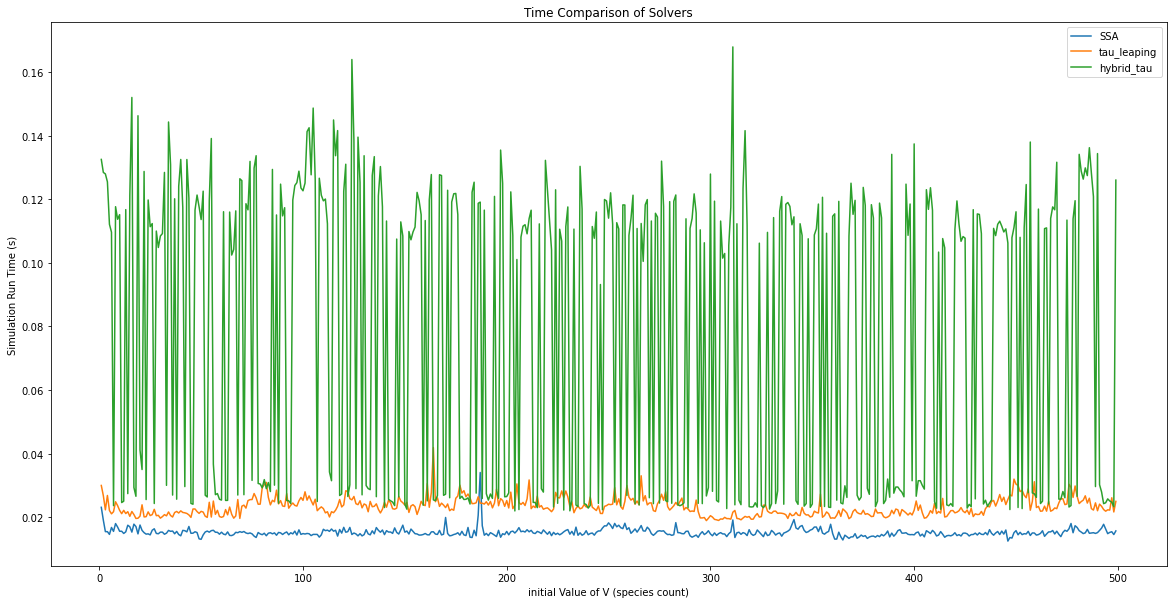

In [5]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V (species count)")
plt.ylabel("Simulation Run Time (s)")
plt.plot(v_range, timing_data['SSA'], label='SSA')
plt.plot(v_range, timing_data['tau_leaping'], label='tau_leaping')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")